# App Classifier

In this project I tried to train and test model feed the scrapped data. The data contains softwares' `Description` and `Labels` of a particular software.

It is an `Multi Label` project. So each description contains more than one label.


Almost 17000 data has been collected for this project.

**Model**

For the model, I used `pytorch` and `HuggingFace` built in models to get better accuracy. 

# Install and set up libraries.

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr onnxruntime onnx nbdev

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import *
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
from onnxruntime.quantization import quantize_dynamic, QuantType


/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


# EDA and Data Wrangling


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nlp/app/final_data.csv')
data.head()

,Description,Category
0,Dragonfire is the open-source virtual assistant project for Ubuntu-based Linux distributions. Her main objective is to serve as a command and control interface to the helmet user. So that you will be able to give orders just by using your voice commands and your eye movements. That makes the helmet handsfree. We are planning to ship Dragonfire as a preinstalled software package on DragonOS Linux Distribution. DragonOS will be a Linux distribution specially designed for the helmet. It will contain various software packages for controlling the helmet. It will be the first of its kind. Dragon...,"Categories\nIntelligent Agents, Chatbot"
1,"FLAML is a lightweight Python library that finds accurate machine learning models automatically, efficiently and economically. It frees users from selecting learners and hyperparameters for each learner. For common machine learning tasks like classification and regression, it quickly finds quality models for user-provided data with low computational resources. It supports both classical machine learning models and deep neural networks. It is easy to customize or extend. Users can find their desired customizability from a smooth range: minimal customization (computational resource budget), ...",Categories\nMachine Learning
2,"G2 is a highly interactive data-driven visualization grammar for statistical charts. with a high level of usability and scalability. It provides a set of grammar, and takes users beyond a limited set of charts to an almost unlimited world of graphical forms. With G2, you can describe the visual appearance and interactive behavior of visualization just by one statement, and generate web-based views using Canvas or SVG. We have summarized a series of story design templates from lots of real data visualization cases so that users can use them directly. Any chart can be drawn flexibly based on...",Categories\nData Visualization
3,"GoCV gives programmers who use the Go programming language access to the OpenCV 4 computer vision library. The GoCV package supports the latest releases of Go and OpenCV v4.5.4 on Linux, macOS, and Windows. Our mission is to make the Go language a “first-class” client compatible with the latest developments in the OpenCV ecosystem. Computer Vision (CV) is the ability of computers to process visual information, and perform tasks normally associated with those performed by humans. CV software typically processes video images, then uses the data to extract information in order to do something...",Categories\nMachine Learning
4,"Why use a task runner? In one word, automation. The less work you have to do when performing repetitive tasks like minification, compilation, unit testing, linting, etc, the easier your job becomes. After you've configured it through a Gruntfile, a task runner can do most of that mundane work for you and your team with basically zero effort. The Grunt ecosystem is huge and it's growing every day. With literally hundreds of plugins to choose from, you can use Grunt to automate just about anything with a minimum of effort. If someone hasn't already built what you need, authoring and publishi...",Categories\nBuilding Automation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(17034, 2)

In [ ]:
data = data.dropna()
data.shape

(17012, 2)

In [ ]:
data['Category'] = data['Category'].apply(lambda x: x.split('\n')[1])

In [ ]:
data.head()

,Description,Category
0,Dragonfire is the open-source virtual assistant project for Ubuntu-based Linux distributions. Her main objective is to serve as a command and control interface to the helmet user. So that you will be able to give orders just by using your voice commands and your eye movements. That makes the helmet handsfree. We are planning to ship Dragonfire as a preinstalled software package on DragonOS Linux Distribution. DragonOS will be a Linux distribution specially designed for the helmet. It will contain various software packages for controlling the helmet. It will be the first of its kind. Dragon...,"Intelligent Agents, Chatbot"
1,"FLAML is a lightweight Python library that finds accurate machine learning models automatically, efficiently and economically. It frees users from selecting learners and hyperparameters for each learner. For common machine learning tasks like classification and regression, it quickly finds quality models for user-provided data with low computational resources. It supports both classical machine learning models and deep neural networks. It is easy to customize or extend. Users can find their desired customizability from a smooth range: minimal customization (computational resource budget), ...",Machine Learning
2,"G2 is a highly interactive data-driven visualization grammar for statistical charts. with a high level of usability and scalability. It provides a set of grammar, and takes users beyond a limited set of charts to an almost unlimited world of graphical forms. With G2, you can describe the visual appearance and interactive behavior of visualization just by one statement, and generate web-based views using Canvas or SVG. We have summarized a series of story design templates from lots of real data visualization cases so that users can use them directly. Any chart can be drawn flexibly based on...",Data Visualization
3,"GoCV gives programmers who use the Go programming language access to the OpenCV 4 computer vision library. The GoCV package supports the latest releases of Go and OpenCV v4.5.4 on Linux, macOS, and Windows. Our mission is to make the Go language a “first-class” client compatible with the latest developments in the OpenCV ecosystem. Computer Vision (CV) is the ability of computers to process visual information, and perform tasks normally associated with those performed by humans. CV software typically processes video images, then uses the data to extract information in order to do something...",Machine Learning
4,"Why use a task runner? In one word, automation. The less work you have to do when performing repetitive tasks like minification, compilation, unit testing, linting, etc, the easier your job becomes. After you've configured it through a Gruntfile, a task runner can do most of that mundane work for you and your team with basically zero effort. The Grunt ecosystem is huge and it's growing every day. With literally hundreds of plugins to choose from, you can use Grunt to automate just about anything with a minimum of effort. If someone hasn't already built what you need, authoring and publishi...",Building Automation


## Findings Important categories and convert into numerical categories.

In [ ]:
table = {}
for val in data['Category'].values.tolist():
  for i in val.split(', '):
    if i in table.keys():
      table[i] += 1
    else:
      table[i] = 1

In [ ]:
print(table)

{'Intelligent Agents': 45, 'Chatbot': 18, 'Machine Learning': 175, 'Data Visualization': 369, 'Building Automation': 18, 'Image Recognition': 11, 'Mathematics': 437, 'Speech Recognition': 19, 'OCR': 56, 'Wireless': 56, 'Robotics': 84, 'Home Automation': 31, 'Autonomous Driving': 2, 'Bio-Informatics': 268, 'Scientific/Engineering': 342, 'GIS': 82, 'Information Analysis': 201, 'GPS': 45, 'Electronic Design Automation (EDA)': 82, 'Linguistics': 50, 'Simulation': 293, 'Computational Fluid Dynamics (CFD)': 14, 'Chemistry': 132, 'Monitoring': 219, 'Hardware Drivers': 125, 'SCADA': 27, 'Test and Measurement': 80, 'Storage': 56, 'Benchmark': 46, 'Molecular Science': 61, 'Hardware': 153, 'Computer-aided technologies (CADD/CAM/CAE)': 36, 'Interface Engine/Protocol Translator': 35, 'Earth Sciences': 67, 'Weather': 7, 'Weather Station': 3, 'Physics': 184, 'Authentication/Directory': 51, 'Artificial Intelligence': 206, 'OS distribution': 151, '3D Printing': 16, 'Machine Translation': 13, 'Statistic

In [ ]:
(len(table))

493

In [ ]:
another_table={}
for i in table.items():
  if i[1] > 10:
    another_table[i[0]] = i[1]

In [ ]:
len(another_table)

334

In [ ]:
cat_list = list(another_table.keys())
# cat_list

In [ ]:
import json
with open('/content/drive/MyDrive/nlp/app/data.json', 'w') as f:
    json.dump(cat_list, f)

In [ ]:
def selected(x):
  cat =[]
  for i in x.split(', '):
    if i in cat_list:
      cat.append(i)
  return cat

In [ ]:
data['selected_categories'] = data['Category'].apply(lambda x: selected(x))

In [ ]:
data.head()

,Description,Category,selected_categories
0,Dragonfire is the open-source virtual assistant project for Ubuntu-based Linux distributions. Her main objective is to serve as a command and control interface to the helmet user. So that you will be able to give orders just by using your voice commands and your eye movements. That makes the helmet handsfree. We are planning to ship Dragonfire as a preinstalled software package on DragonOS Linux Distribution. DragonOS will be a Linux distribution specially designed for the helmet. It will contain various software packages for controlling the helmet. It will be the first of its kind. Dragon...,"Intelligent Agents, Chatbot","[Intelligent Agents, Chatbot]"
1,"FLAML is a lightweight Python library that finds accurate machine learning models automatically, efficiently and economically. It frees users from selecting learners and hyperparameters for each learner. For common machine learning tasks like classification and regression, it quickly finds quality models for user-provided data with low computational resources. It supports both classical machine learning models and deep neural networks. It is easy to customize or extend. Users can find their desired customizability from a smooth range: minimal customization (computational resource budget), ...",Machine Learning,[Machine Learning]
2,"G2 is a highly interactive data-driven visualization grammar for statistical charts. with a high level of usability and scalability. It provides a set of grammar, and takes users beyond a limited set of charts to an almost unlimited world of graphical forms. With G2, you can describe the visual appearance and interactive behavior of visualization just by one statement, and generate web-based views using Canvas or SVG. We have summarized a series of story design templates from lots of real data visualization cases so that users can use them directly. Any chart can be drawn flexibly based on...",Data Visualization,[Data Visualization]
3,"GoCV gives programmers who use the Go programming language access to the OpenCV 4 computer vision library. The GoCV package supports the latest releases of Go and OpenCV v4.5.4 on Linux, macOS, and Windows. Our mission is to make the Go language a “first-class” client compatible with the latest developments in the OpenCV ecosystem. Computer Vision (CV) is the ability of computers to process visual information, and perform tasks normally associated with those performed by humans. CV software typically processes video images, then uses the data to extract information in order to do something...",Machine Learning,[Machine Learning]
4,"Why use a task runner? In one word, automation. The less work you have to do when performing repetitive tasks like minification, compilation, unit testing, linting, etc, the easier your job becomes. After you've configured it through a Gruntfile, a task runner can do most of that mundane work for you and your team with basically zero effort. The Grunt ecosystem is huge and it's growing every day. With literally hundreds of plugins to choose from, you can use Grunt to automate just about anything with a minimum of effort. If someone hasn't already built what you need, authoring and publishi...",Building Automation,[Building Automation]


In [ ]:
def label(x):
  cat_label = [0]*len(cat_list)
  for i in x:
    ind = cat_list.index(i)
    cat_label[ind] = 1

  return cat_label

In [ ]:
data['cat_label']  = data['selected_categories'].apply(lambda x: label(x))

In [ ]:
len(cat_list)

334

In [ ]:
data['len'] = data['selected_categories'].apply(lambda x: len(x))


In [ ]:
data[data['len'] > 5]

,Description,Category,selected_categories,cat_label,len
240,"The aim of the project is to develop an open source iSCSI target with professional features, works well in enterprise environment under real workload, and is scalable and versatile enough to meet the challenge of future storage needs and developements.","Software Development, Backup, Networking, Hardware Drivers, Clustering, Scientific/Engineering","[Software Development, Backup, Networking, Hardware Drivers, Clustering, Scientific/Engineering]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
533,An open source workbench for chemo- and bioinformatics built on the Eclipse Rich Client Platform (RCP).,"Algorithms, Frameworks, Molecular Science, Chemistry, Bio-Informatics, Data Visualization","[Algorithms, Frameworks, Molecular Science, Chemistry, Bio-Informatics, Data Visualization]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
660,"SeaBreeze is a device driver library that provides an interface to select Ocean Optics spectrometers. It is written in C/C++ and builds and runs on Windows (XP/7/8), MacOSX, and Linux (x86/x64/ARM).","Hardware Drivers, Molecular Science, Ecosystem Sciences, Medical, Physics, Earth Sciences","[Hardware Drivers, Molecular Science, Ecosystem Sciences, Medical, Physics, Earth Sciences]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
742,"Extracts dependencies and OO metrics from Java class files produced by most Java compilers. Computes API differences between versions. No source needed. Includes both Swing and command-line interfaces, with XSL stylesheets for formatting output.","UML, Build Tools, Object Oriented, Design, Data Visualization, Information Analysis","[UML, Build Tools, Object Oriented, Design, Data Visualization, Information Analysis]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
1112,"Calculation of camshafts - allows to define a camshaft profile on the set trajectory which should provide the given mechanism. The trajectory can be set graphically, co-ordinates or function.","UML, Robotics, Simulation, Data Visualization, Mathematics, Information Analysis","[UML, Robotics, Simulation, Data Visualization, Mathematics, Information Analysis]","[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
...,...,...,...,...,...
15938,Servlet container extensions that help web developers write full featured Java web applications.,"Enterprise, Security, Browsers, HTTP Servers, Application Servers, eCommerce","[Enterprise, Security, Browsers, HTTP Servers, Application Servers, eCommerce]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
data = data.drop(data[data['len']==0].index,axis = 0)

In [ ]:
data.shape

(16962, 5)

# Train model using preprocessed data

In [ ]:
model_name ='distilroberta-base' #"distilroberta-base" #  bs 2
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(cat_list)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=cat_list))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('cat_label'), splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [ ]:
dls = dblock.dataloaders(data, bs=32)

In [ ]:
dls.show_batch(dataloaders=dls, max_n=5)

,text,target
0,"Сборка Debian с установленным и оформленным рабочим окружением LXDE и IceWM, а так же предустановленными драйверами non-free и программами для различных задач (офис, видео- и аудио - редактирование, системное администрирование и пр.).\n\nПредставлены сборки 32 бит (i386) и 64 бит (amd64).\n\nУчетная запись LiveCD:\nПользователь: user\nПароль: live\n\nБУДЬТЕ ВНИМАТЕЛЬНЫ\nЯ выложил по 2 варианта сборок. Разберем на примере дебиан 10 x32.\n- debian-10-i386-lxde.iso - моя сборка на основе debootstrap\n- debian-10-i386-lxde-nonfree.iso - сборка на основе iso скачанного с �",[Live CD]
1,OxOffice 為晟鑫科技提出的整合性商用導入方案，相關套件是基於 LibreOffice 計劃，修正相容性及軟體問題後重新提供給商用客戶之版本，軟體重點特色為修正在中文環境中常見的軟體及中文問題，其他如文件格式、外觀等皆與官方版本相容，並符合 ODF 標準。\n\n為推動華文地區 ODF 相關中文環境應用，晟鑫科技也在 2015 年 8 月推出 OxOffice Community Edition 計劃，將 LibreOffice 中文環境中所遭遇之問題、設定及調整，以及符合中文環境使用者之習慣之相關修正，以原有開放原始碼的形式釋出，並協助將其統一回報至 LibreOffice 官方，並透過 OxOffice 加速推廣至使用者端，藉此加速推�,[Office Suites]
2,Текстовый редактор с поддержкой шифрования. Переведён на русский язык.\n\nA text editor with encryption support. Translated into Russian.\n\nAlternate link: https://github.com/mrkaban/CryptotextEditor\n\nОфициальный сайт: https://xn--90abhbolvbbfgb9aje4m.xn--p1ai/%D0%B1%D0%B5%D0%B7%D0%BE%D0%BF%D0%B0%D1%81%D0%BD%D0%BE%D1%81%D1%82%D1%8C/%D1%88%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5/cryptotext-editor-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9-%D1%80%D0%B5%D0%B4%D0%B0%D0%BA%D1%82%D0%BE%D1%80-%D1%81-%D1%88%D0%B8%D1%84%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC.html,[Cryptography]
3,"Программа составлена с учётом психологии запоминания.\n\nПроизводится многоуровневый отлов ошибок в памяти.\n\nНеотвеченные или неуверенно отвеченные вопросы повторяются до верного ответа с первого раза.\nЕсть функции возврата, кнопка ""Спросить инструктора"" (билет и вопрос добавляется в специальный файл), оценка результатов и пр.\n\nПодробное и красочное описание в архиве (сюда не помещается).",[Exam]
4,Hệ thống quản lý sân bóng đá mini (Mini Football Field Management System)\n\n* Nhóm sinh viên thực hiện\n- Nguyễn Tiến Dũng (MSSV: 16520259 - Lớp: PMCL2016.1)\n- Nguyễn Việt Tiến (MSSV: 16521233 - Lớp: PMCL2016.3)\n\n* Các phân hệ chính\n- Quản lý khách hàng\n- Quản lý nhân viên\n- Quản lý sân bóng\n- Quản lý nhà cung cấp\n- Quản lý đơn nhập hàng\n- Quản lý tài sản thiết bị\n- Quản lý phiếu đặt sân\n- Quản lý dịch vụ\n- Quản lý hóa đơn dịch vụ\n- Quản lý người dùng\n- Quản lý cài đặt,[Sports Games]


In [ ]:
model = BaseModelWrapper(hf_model)
 
acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls, 
                  model,
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.019054606556892395, valley=0.0003981071640737355)

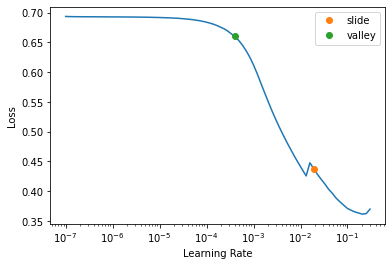

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(1,slice(0.0003981071640737355,0.019054606556892395))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.026417,0.024115,0.993045,00:52


In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.0012022644514217973, valley=3.630780702224001e-05)

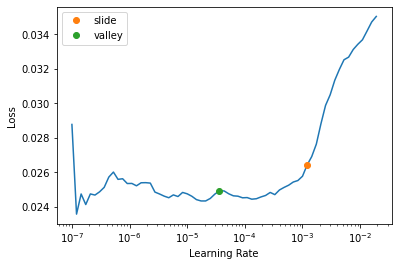

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:

learner.fit_one_cycle(3,slice(3.630780702224001e-05,0.0012022644514217973))
     

epoch,train_loss,valid_loss,accuracy_multi,time


In [ ]:
learner.export("/content/drive/MyDrive/nlp/app/model/bertabaporu-large.pkl")

In [ ]:
model = load_learner('/content/drive/MyDrive/nlp/app/model/bertabaporu-large.pkl')

In [ ]:
model.blurr_predict("leave me a i live on this software allows staff to perform cell differentials using a keyboard simple useful a new msi installer has been created - an icon will appear on the desktop don t be alarmed when installing the program windows will display an alert showing unrecognized app just click more info and then click run anyway to install wbc diff counter this warning should go away once the program has gained reputation as safe and i haven t purchased a microsoft authenticode certificate so publisher will always show unknown requirements windows 7 8 or windows 10 net 4 5 2 required program may not work on windows xp older versions support windows x")

# Convert trained model into onnx


In [ ]:
classifier = model.model.hf_model.eval()
torch.onnx.export(
    classifier, 
    torch.LongTensor([[0] * 512]),
    '/content/drive/MyDrive/nlp/app/model/classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)


In [ ]:
onnx_model_path = '/content/drive/MyDrive/nlp/app/model/classifier.onnx'
quantized_onnx_model_path = '/content/drive/MyDrive/nlp/app/model/classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)